In [40]:
# 테스트를 위해 아래의 셀을 실행해 주세요.
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

df = sns.load_dataset("tips")
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. df 로 선언된 데이터프레임에서 tip 이 5 보다 크고 smoker 가 "No"에 해당되는 데이터만 가져와서 df_no_smoker 라는 변수에 담아주세요.
* 다음의 결과가 나오도록 합니다. `(12, 7)` 라는 결과가 출력되어야 합니다.

In [41]:
df_no_smoker = df[(df['tip'] > 5) & (df['smoker'] == 'No')]
df_no_smoker.shape

(12, 7)

## 2. groupby 를 써서 아래의 결과가 나오도록 출력해주세요. 또, reset_index() 를 사용해서 인덱스를 컬럼으로 만들어 주세요.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>day</th>
      <th>time</th>
      <th>count</th>
      <th>sum</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Thur</td>
      <td>Lunch</td>
      <td>3</td>
      <td>17.72</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Sat</td>
      <td>Dinner</td>
      <td>4</td>
      <td>29.23</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Sun</td>
      <td>Dinner</td>
      <td>5</td>
      <td>27.01</td>
    </tr>
  </tbody>
</table>

In [42]:
df_no_smoker

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


In [46]:
df_no_smoker.groupby(['day', 'time'])['tip'].agg(['count','sum']).sort_values(by='sum').reset_index().head(3)

,day,time,count,sum
0,Thur,Lunch,3,17.72
1,Sun,Dinner,5,27.01
2,Sat,Dinner,4,29.23


## 3. pivot_table 을 사용해서 아래의 결과가 출력되도록 해주세요.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">count</th>
      <th colspan="2" halign="left">sum</th>
    </tr>
    <tr>
      <th>time</th>
      <th>Lunch</th>
      <th>Dinner</th>
      <th>Lunch</th>
      <th>Dinner</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Thur</th>
      <td>61.0</td>
      <td>1.0</td>
      <td>1077.55</td>
      <td>18.78</td>
    </tr>
    <tr>
      <th>Fri</th>
      <td>7.0</td>
      <td>12.0</td>
      <td>89.92</td>
      <td>235.96</td>
    </tr>
    <tr>
      <th>Sat</th>
      <td>NaN</td>
      <td>87.0</td>
      <td>NaN</td>
      <td>1778.40</td>
    </tr>
    <tr>
      <th>Sun</th>
      <td>NaN</td>
      <td>76.0</td>
      <td>NaN</td>
      <td>1627.16</td>
    </tr>
  </tbody>
</table>

In [44]:
df.pivot_table(index='day',columns='time',values='total_bill',aggfunc=('count','sum'))

count             sum         
time Lunch Dinner    Lunch   Dinner
day                                
Thur    61      1  1077.55    18.78
Fri      7     12    89.92   235.96
Sat      0     87      NaN  1778.40
Sun      0     76      NaN  1627.16

## 4. lmplot 으로 x 축에 tip 컬럼을 y축에 total_bill 컬럼을 지정하고 hue 값에 time을 지정해 색상에 따라 다르게 출력되도록 해주세요.
<img src="https://i.imgur.com/PT5INwE.png" width="400">

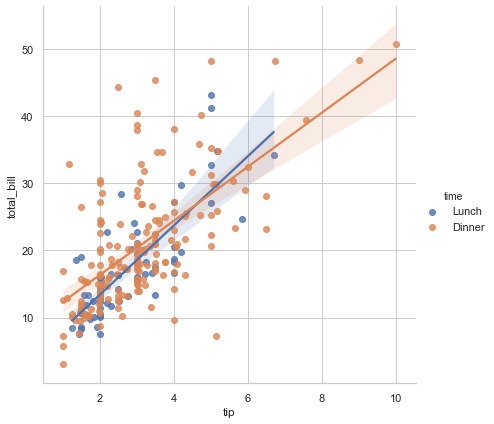

In [56]:
sns.lmplot(data=df,x='tip',y='total_bill',hue='time',height=6)

## 5. violinplot 으로 x축에 day를 y에 total_bill을 출력하고 smoker로 색상을 구분해주세요. 또 split=True 옵션을 사용해서 hue 옵션이 반씩 표현되도록 해주세요.
<img src="https://i.imgur.com/eML9ZKv.png" width="400">

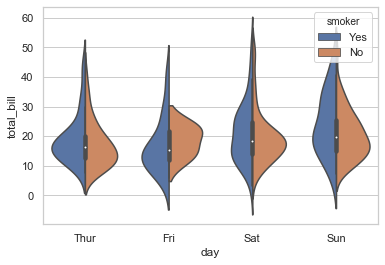

In [58]:
sns.violinplot(data=df,x='day',y='total_bill',hue='smoker',split=True)

In [59]:
# 테스트를 위해 셀을 실행해 주세요.
df = sns.load_dataset("mpg")
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


## 6. fillna 를 통해 결측치를 모두 0으로 채워주세요. 또, 결측치를 채운 결과를 df 변수에 다시 담아주세요.

결측치를 확인했을 때 아래의 결과가 나오도록 해주세요.

```
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
```

In [60]:
df = df.fillna(0)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64